In [153]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sb
from sklearn.cluster import KMeans

# Считывание файла

In [6]:
import sys
path = sys.path.append("./")

In [171]:
HOME = sys.path[3]
FILE = HOME + "/files/"

dataset = pd.read_csv(FILE + "hackathon.csv", sep=";")
output = pd.read_csv(FILE + "output (1).csv", encoding="cp1251", sep=";", index_col=False)

In [172]:
dataset['okved'] = dataset['okved'].apply(lambda x : x.split('.')[0]).astype(int)

In [174]:
dataset.groupby(['okved', 'INN'])['region'].value_counts()

okved  INN           region            
1      10100002801   Республика Адыгея     1
       10100003548   Республика Адыгея     1
       10100025527   Республика Адыгея     1
       10100040910   Республика Адыгея     1
       10100067654   Республика Адыгея     1
                                          ..
98     910403595714  Республика Крым       1
       910610185018  Республика Крым       1
99     232006668307  Краснодарский край    1
       771411703703  г Москва              1
       772032467204  г Москва              1
Name: region, Length: 3843261, dtype: int64

In [175]:
output['region'].unique().shape[0]

7

In [176]:
output.drop("Unnamed: 0", axis=1)

,INN,registration_date,region,okved,industry,section,cluster_id,start_date,end_date,business_count
0,20502013704,2014-12-05,Республика Башкортостан,96.02,Предоставление услуг парикмахерскими и салонам...,Предоставление прочих видов услуг,NaN,2014-12-05,NaN,2
1,10404244707,2019-08-14,Республика Адыгея,96.02,Предоставление услуг парикмахерскими и салонам...,Предоставление прочих видов услуг,NaN,2019-08-14,NaN,1
2,20201737037,2019-05-08,Республика Башкортостан,96.02,Предоставление услуг парикмахерскими и салонам...,Предоставление прочих видов услуг,NaN,2019-05-08,NaN,3
3,20103734461,2016-09-02,Республика Башкортостан,96.02,Предоставление услуг парикмахерскими и салонам...,Предоставление прочих видов услуг,NaN,2016-09-02,NaN,1
4,20201871427,2019-08-05,Республика Башкортостан,49.41.2,Перевозка грузов неспециализированными автотра...,Транспортировка и хранение,NaN,2019-08-05,NaN,1
...,...,...,...,...,...,...,...,...,...,...
95,20501810506,2022-08-10,Республика Башкортостан,43.21,Производство электромонтажных работ ...,Строительство,NaN,2022-08-10,NaN,2
96,20501898772,2019-03-13,Республика Башкортостан,01.41,"Разведение молочного крупного рогатого скота, ...","Сельское, лесное хозяйство, охота, рыболовство...",NaN,2019-03-13,NaN,2
97,20401583401,2019-02-26,Республика Башкортостан,01.41,"Разведение молочного крупного рогатого скота, ...","Сельское, лесное хозяйство, охота, рыболовство...",NaN,2019-02-26,NaN,1
98,21101785374,2008-11-28,Республика Башкортостан,01.41,"Разведение молочного крупного рогатого скота, ...","Сельское, лесное хозяйство, охота, рыболовство...",NaN,2008-11-28,NaN,1


# Запускаем предобработку данных

In [177]:
output['okved'] = output['okved'].apply(lambda x : x.split('.')[0]).astype(int)

In [178]:
cat_feature = ["registration_date", "region", "okved", "section"]
num_feature = ["business_count"]

In [179]:
df = pd.DataFrame()

Преобразует строковые категориальный признаки в числовые

In [180]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df["okved"] = output['okved']
df["region"] = labelencoder.fit_transform(output["region"].values)
df["section"] = labelencoder.fit_transform(output["section"].values)
df["count"] = output["business_count"]

In [181]:
df

,okved,region,section,count
0,96,3,6,2
1,96,2,6,1
2,96,3,6,3
3,96,3,6,1
4,49,3,10,1
...,...,...,...,...
95,43,3,8,2
96,1,3,7,2
97,1,3,7,1
98,1,3,7,1


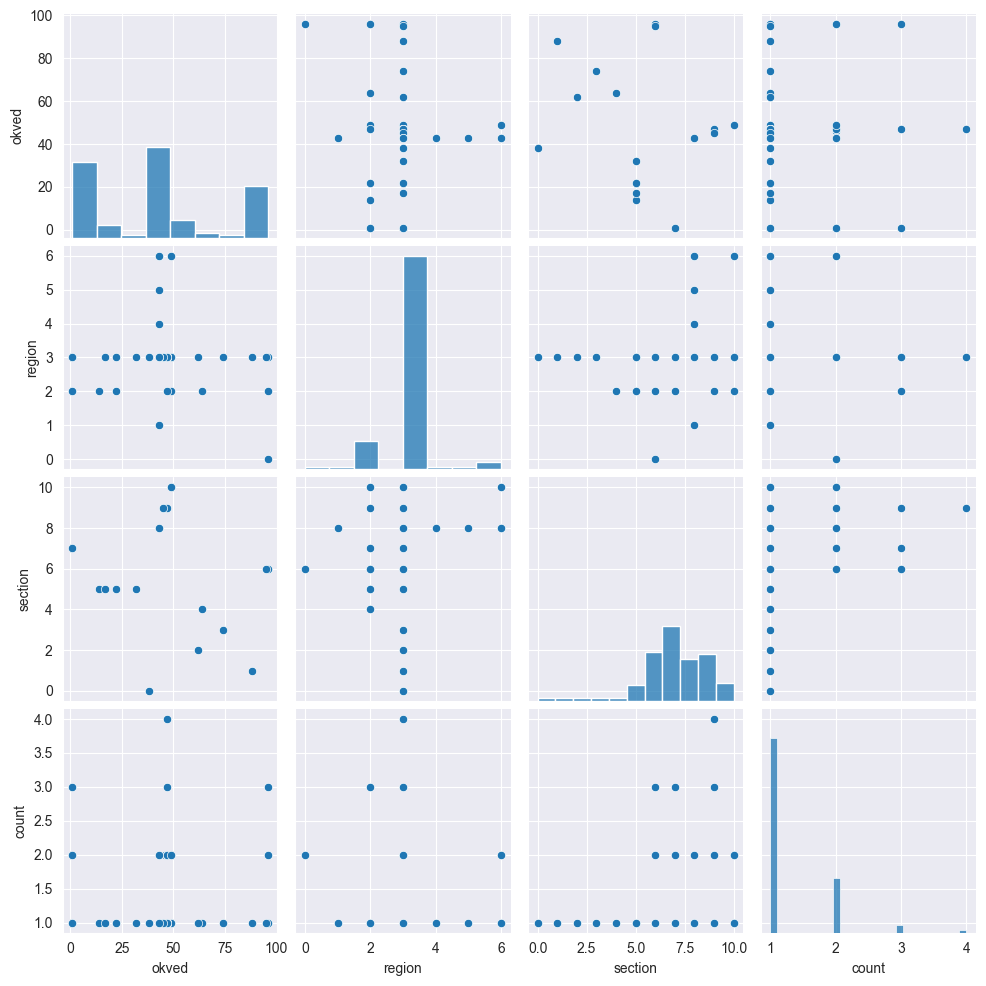

In [183]:
sb.pairplot(df)
None

In [184]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)                   # оставим только два признака
# новые признаки -- это линейная комбинация старых
# они неинтерпретируемы, но позволяют оценить число кластеров
X = pca.fit_transform(df.values )

print("explained variance per feature", end = "")
print(pca.explained_variance_ratio_)
print(f"2 compomemt - explained variance {np.sum(pca.explained_variance_ratio_):.3f}")

explained variance per feature[0.99637909 0.00286035]
2 compomemt - explained variance 0.999


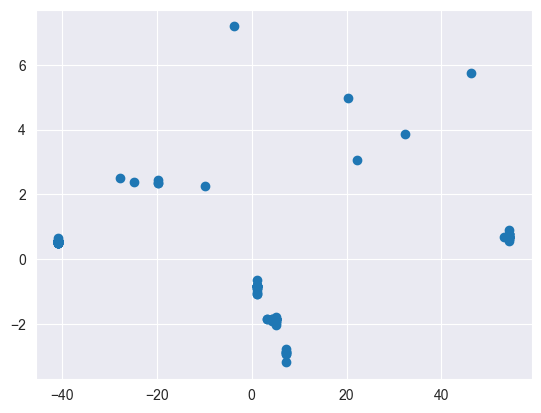

In [185]:
import matplotlib.pyplot as plt

plt.scatter( X[:, 0], X[:, 1] )

Отображение кластеров. Код взят с https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html

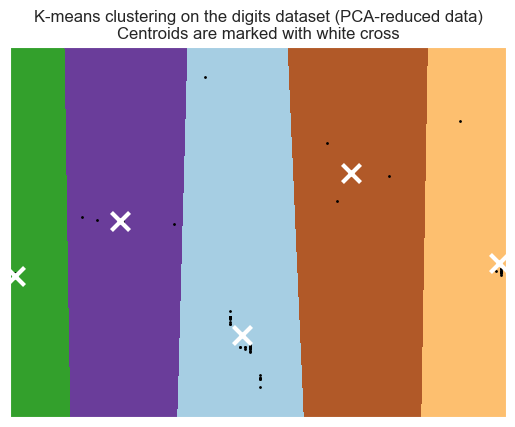

In [186]:
kmeans = KMeans(init="k-means++", n_clusters=5)
kmeans.fit(X)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(X[:, 0], X[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [188]:
pca3 = PCA(n_components=3)                   # оставим только два признака
# новые признаки -- это линейная комбинация старых
# они неинтерпретируемы, но позволяют оценить число кластеров
X3 = pca3.fit_transform( df.values )

print(f"3 compomemt - explained variance {np.sum(pca.explained_variance_ratio_):.3f}")

fig = px.scatter_3d( x=X3[:,0], y=X3[:,1], z=X3[:,2], width=700)
fig.show()

3 compomemt - explained variance 0.999


In [190]:
km = KMeans (n_clusters= 5, random_state=42, algorithm="full")
km.fit(df.values)
km.predict(df.values)

C:\Users\aveoc\.virtualenvs\clustering_hackatone-IBb2UeHh\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning:

algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.



array([1, 1, 1, 1, 0, 1, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 3, 2,
       3, 0, 1, 0, 1, 0, 0, 0, 0, 1, 4, 4, 0, 0, 0, 3, 0, 1, 2, 0, 1, 1,
       0, 0, 0, 0, 0, 3, 1, 0, 1, 1, 1, 0, 0, 2, 2, 1, 2, 0, 1, 2, 0, 2,
       0, 1, 2, 2, 0, 4, 2, 0, 0, 0, 2, 2, 0, 2, 0, 3, 2, 0, 1, 2, 2, 3,
       0, 1, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0])

In [191]:
from sklearn.cluster import SpectralClustering

sc = SpectralClustering(n_clusters=5, random_state=42)
sc.fit_predict(df.values)

C:\Users\aveoc\.virtualenvs\clustering_hackatone-IBb2UeHh\lib\site-packages\sklearn\cluster\_kmeans.py:379: ConvergenceWarning:

Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [192]:
df

,okved,region,section,count
0,96,3,6,2
1,96,2,6,1
2,96,3,6,3
3,96,3,6,1
4,49,3,10,1
...,...,...,...,...
95,43,3,8,2
96,1,3,7,2
97,1,3,7,1
98,1,3,7,1


In [193]:
sc.fit_predict(df.values)

C:\Users\aveoc\.virtualenvs\clustering_hackatone-IBb2UeHh\lib\site-packages\sklearn\cluster\_kmeans.py:379: ConvergenceWarning:

Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [194]:
res = pd.read_csv(FILE + "parsed_data.csv")

In [119]:
res.drop("Unnamed: 0", axis=1, inplace=True)

In [250]:
res

,Unnamed: 0,INN,region,okved,start_date,end_date,business_count
0,0,20502013704,Республика Башкортостан,96,2014-12-05,NaN,2
1,0,20201737037,Республика Башкортостан,96,2019-05-08,NaN,3
2,0,20103734461,Республика Башкортостан,96,2016-09-02,NaN,1
3,0,20201871427,Республика Башкортостан,49,2019-08-05,NaN,1
4,0,20503050018,Республика Башкортостан,96,2019-06-24,NaN,1
...,...,...,...,...,...,...,...
1175,0,70200801806,Брянская область,49,2021-06-08,NaN,1
1176,0,81408812403,Брянская область,47,2012-03-30,NaN,1
1177,0,90800464383,Брянская область,62,2019-04-17,NaN,2
1178,0,40702980677,Еврейская автономная область,47,2018-04-25,NaN,1


In [256]:
from tqdm import tqdm

# okved_region = pd.DataFrame(column=["region", "okved", "count"])


iteration = list()

for region in tqdm(res["region"]):
    for okved in res[(res["region"]==region)]["okved"]:
        median = res[(res["region"]==region) & (res["okved"] == okved)]["business_count"].median()
        iteration.append((region, okved, median))

100%|██████████| 1180/1180 [00:09<00:00, 120.81it/s]


In [260]:
ex = pd.DataFrame(iteration, columns = ["region", "okved", "median"])

In [199]:
df = pd.DataFrame()
labelencoder = LabelEncoder()
df["INN"] = dataset["INN"]
df["okved"] = dataset["okved"]
df["region"] = labelencoder.fit_transform(dataset["region"].values)
df["section"] = labelencoder.fit_transform(dataset["section"].values)

In [220]:
# get day work company
from datetime import datetime

df["day"] = (datetime.now() - pd.to_datetime(dataset["registration_date"])).dt.days

,INN,registration_date,region,okved,industry,section,cluster_id
0,20502013704,2014-12-05,Республика Башкортостан,96,Предоставление услуг парикмахерскими и салонам...,Предоставление прочих видов услуг,NaN
1,10404244707,2019-08-14,Республика Адыгея,96,Предоставление услуг парикмахерскими и салонам...,Предоставление прочих видов услуг,NaN
2,20201737037,2019-05-08,Республика Башкортостан,96,Предоставление услуг парикмахерскими и салонам...,Предоставление прочих видов услуг,NaN
3,20103734461,2016-09-02,Республика Башкортостан,96,Предоставление услуг парикмахерскими и салонам...,Предоставление прочих видов услуг,NaN
4,20201871427,2019-08-05,Республика Башкортостан,49,Перевозка грузов неспециализированными автотра...,Транспортировка и хранение,NaN
...,...,...,...,...,...,...,...
3843256,500913259367,2022-07-28,Московская область,47,Деятельность по осуществлению торговли через а...,Торговля оптовая и розничная; ремонт автотранс...,NaN
3843257,522303478526,2022-08-01,Нижегородская область,47,Торговля розничная по почте или по информацион...,Торговля оптовая и розничная; ремонт автотранс...,NaN
3843258,390103227400,2022-08-01,Калининградская область,63,"Деятельность по обработке данных, предоставлен...",Деятельность в области информации и связи,NaN
3843259,775115558281,2022-08-01,г Москва,47,Торговля розничная домашними животными и корма...,Торговля оптовая и розничная; ремонт автотранс...,NaN


In [246]:
counts = list()
for i in tqdm(range(dataset.shape[0])):
    counts.append(dataset[["region", "okved"]] in ))

  0%|          | 12214/3843261 [07:18<38:12:29, 27.85it/s]


KeyboardInterrupt: 

In [290]:
ex

,region,okved,median
0,Республика Башкортостан,96,1.5
1,Республика Башкортостан,96,1.5
2,Республика Башкортостан,96,1.5
3,Республика Башкортостан,49,1.0
4,Республика Башкортостан,96,1.5
...,...,...,...
16947,Брянская область,49,1.0
16948,Брянская область,47,1.0
16949,Брянская область,62,2.0
16950,Еврейская автономная область,47,1.0


In [ ]:
median = []
for i in tqdm(dataset[["region", "okved"]].values):
    median.append(ex[(ex["region"]==i[0]) & (ex["okved"] == i[1])]["median"])

  2%|▏         | 83436/3843261 [01:44<1:18:07, 802.06it/s]

In [289]:
dataset[["region", "okved"]].values

array([['Республика Башкортостан', 96],
       ['Республика Адыгея', 96],
       ['Республика Башкортостан', 96],
       ...,
       ['Калининградская область', 63],
       ['г Москва', 47],
       ['Московская область', 47]], dtype=object)

In [ ]:
for i in tqdm(enumerate(dataset[["region", "okved"]]))

In [247]:
dataset[["region", "okved"]]

,region,okved
0,Республика Башкортостан,96
1,Республика Адыгея,96
2,Республика Башкортостан,96
3,Республика Башкортостан,96
4,Республика Башкортостан,49
...,...,...
3843256,Московская область,47
3843257,Нижегородская область,47
3843258,Калининградская область,63
3843259,г Москва,47
